In [1]:
import sys
import os
from matplotlib import pyplot as plt

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data


In [2]:
dataset_100yr = TSD(file_path='../datasets/100_yr_dataset.xlsx')
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')

Dataset loaded from ../datasets/100_yr_dataset.xlsx
Dataset loaded from ../datasets/power_transitions.xlsx


In [48]:
# print(dataset_100yr.scv.PolityName.value_counts().head(20))
# print(dataset_PT.scv_imputed.PolityName.value_counts().head(20))
dataset_100yr.scv_clean

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,Information,Money,MSP,PC_1,PC_2
0,Southern Mesopotamia,132,iq_abbasid_cal_1,800,7.512105,6.919078,5.845098,5.000000,0.454545,1.000000,0.933333,5,1.0,5.695039,-0.213379
1,Southern Mesopotamia,132,iq_abbasid_cal_1,900,7.037559,6.000000,5.954243,5.000000,0.454545,1.000000,0.933333,5,1.0,5.341890,-0.473550
2,Southern Mesopotamia,484,iq_abbasid_cal_2,1200,6.591065,5.875061,6.000000,4.253100,0.636364,0.500000,0.800000,5,1.0,4.438205,-0.197785
3,Susiana,107,ir_achaemenid_emp,-500,7.403081,6.733133,5.301030,5.724473,1.000000,0.916667,0.933333,5,1.0,6.202193,-0.631978
4,Susiana,107,ir_achaemenid_emp,-400,7.517106,6.629093,5.301030,5.724473,1.000000,0.916667,0.933333,5,1.0,6.209598,-0.646773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,Orkhon Valley,272,mn_hunnu_emp,-200,6.176091,6.604613,3.621553,3.158372,0.090909,0.083333,0.000000,1,0.1,0.222922,1.848735
390,Orkhon Valley,272,mn_hunnu_emp,-100,6.176091,6.604613,3.621553,3.158372,0.090909,0.083333,0.000000,1,0.1,0.222922,1.848735
391,Galilee,105,il_yisrael,-1000,4.657494,3.933186,4.298512,4.500000,0.454545,0.500000,0.533333,3,NaN,1.718831,-0.313501
392,Galilee,105,il_yisrael,-900,5.269856,3.933186,4.298512,4.500000,0.454545,0.500000,0.533333,3,NaN,1.909317,-0.248553


AttributeError: 'DataFrame' object has no attribute 'NGA'

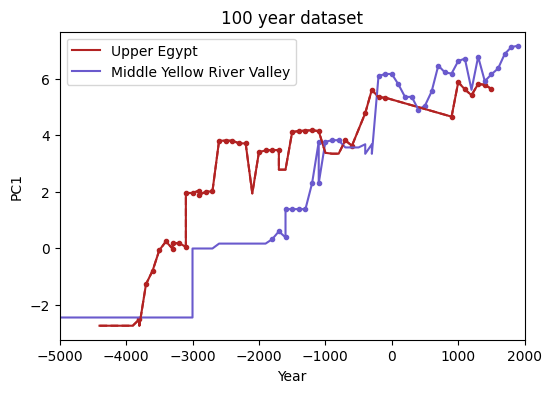

In [23]:
ngas = ['Upper Egypt','Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'PC_1'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = nga, color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('100 year dataset')
plt.xlim(-5000,2000)
plt.legend()


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = nga, color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PT dataset')
plt.xlim(-5000,2000)

AttributeError: 'DataFrame' object has no attribute 'NGA'

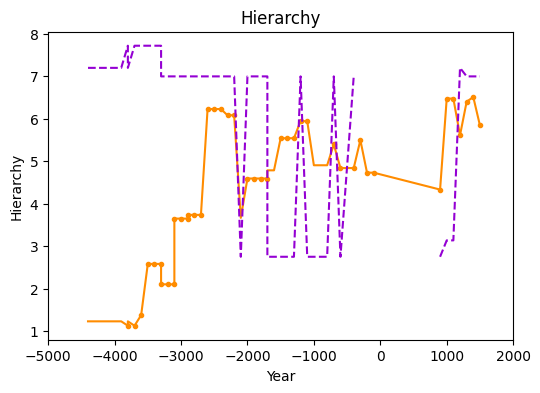

In [6]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'Hierarchy'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = '100 years dataset', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel(variable)
plt.title(variable)
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'PT dataset', color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)

plt.xlim(-5000,2000)


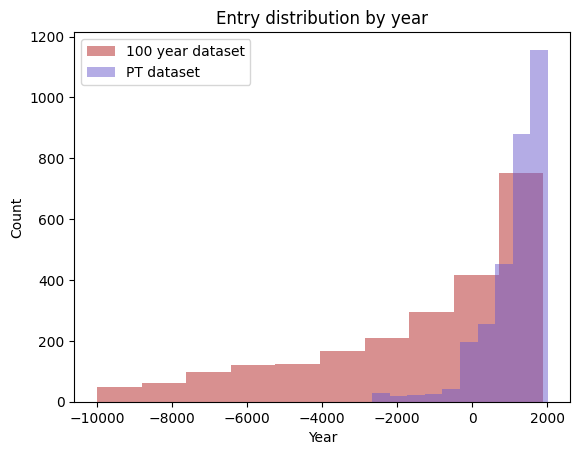

In [26]:
plt.hist(dataset_100yr.scv.Year, color = 'firebrick', alpha = 0.5, label = '100 year dataset')
plt.hist(dataset_PT.scv.Year, color='slateblue', alpha = 0.5, label = 'PT dataset')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')

plt.title('Entry distribution by year')
plt.show()

In [3]:
import pandas as pd
import pyreadr
from src.utils import download_data
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")
polity_df = download_data("https://seshatdata.com/api/core/polities/")
R_data = data['raw.cc.mean']
R_data_imp = data['imp.cc.mean']

Downloaded 839 rows


In [4]:
R_data['NGA'] = R_data.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

In [5]:

R_data = R_data.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

In [6]:
dataset_R = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
dataset_R.initialize_dataset_grid(-10000,2000,100)
dataset_R.scv = R_data[all_cols]

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv
Downloaded 863 rows


In [7]:
dataset_R.impute_missing_values()
dataset_R.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 78.91%
PC2: 5.14%
PC3: 4.67%
PC4: 3.66%
PC5: 3.32%
PC6: 1.68%
PC7: 1.54%
PC8: 1.08%


PCA(n_components=8)

In [8]:
dataset_R.save_dataset(path = '../datasets', name = 'R_data_with_PCA')

dataset_R2 = TSD(file_path='../datasets/R_data_with_PCA.xlsx')

Dataset saved to ../datasets/R_data_with_PCA.xlsx
Dataset loaded from ../datasets/R_data_with_PCA.xlsx


In [9]:
R_data_imp['NGA'] = R_data_imp.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

R_data_imp = R_data_imp.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

dataset_R2.scv_imputed = R_data_imp[all_cols]

In [10]:
dataset_R2.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 80.37%
PC2: 5.82%
PC3: 3.88%
PC4: 3.52%
PC5: 3.31%
PC6: 1.58%
PC7: 1.22%
PC8: 0.29%


/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:319: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]


PCA(n_components=8)

AttributeError: 'DataFrame' object has no attribute 'NGA'

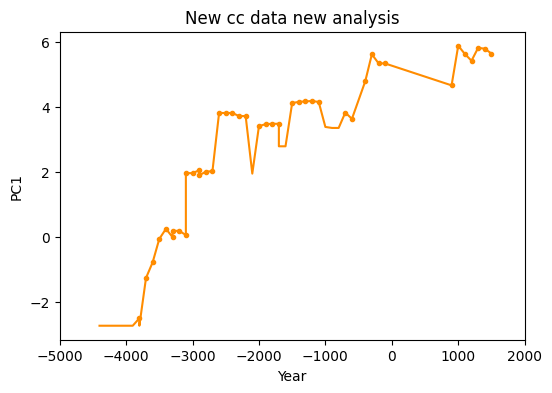

In [37]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'PC_1'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)

# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data old imputed data')
plt.xlim(-5000,2000)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Year'

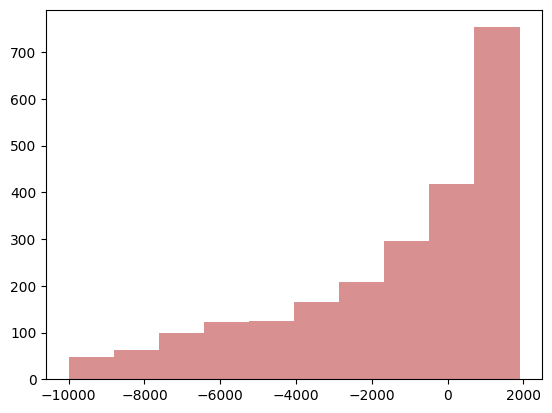

In [ ]:
plt.hist(dataset_100yr.scv_imputed.Year, color = 'firebrick', alpha = 0.5, label = 'new dataset')
plt.hist(dataset_R.scv_imputed.Year, color='slateblue', alpha = 0.5, label = 'old dataset')
plt.legend()

AttributeError: 'DataFrame' object has no attribute 'NGA'

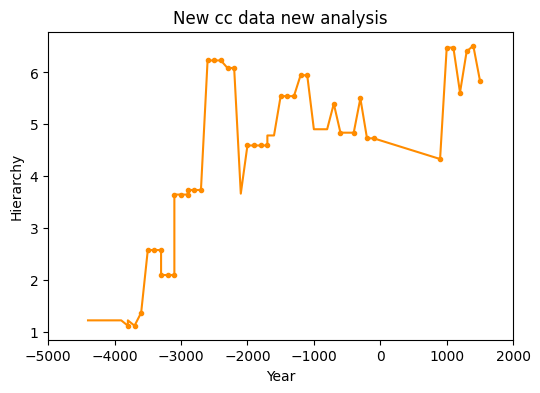

In [12]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'Hierarchy'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel(variable)
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)



# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'-.', label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title(variable)
plt.xlim(-5000,2000)
plt.show()

In [11]:
raw_dat = data["datawide.mean"]
name_mapping = {}
for col in raw_dat.columns:
    new_name = col.replace('.', '-')
    name_mapping[col] = new_name.lower()

# rename the columns to make them match between datasets
raw_dat = raw_dat.rename(columns=name_mapping)
raw_dat.nga = raw_dat.nga.apply(lambda x: x[4:])
raw_dat = raw_dat.rename(columns={'nga': 'PolityName', 
                                  'nga-time': 'Year', 
                                  'polity-population':'polity-populations', 
                                  'polity-territory':'polity-territories', 
                                  'population-of-the-largest-settlement':'population-of-the-largest-settlements',
                                  'settlement-hierarchy':'settlement-hierarchies',
                                  'professional-priesthood':'professional-priesthoods',
                                  'examination-system':'examination-systems',
                                  'formal-legal-code':'formal-legal-codes',
                                  'merit-promotion':'merit-promotions',
                                  'drinking-water-supply-systems':'drinking-water-supplies',
                                  'general-postal-service':'general-postal-services',
                                  'script':'scripts',
                                  'phonetic-alphabetic-writing':'phonetic-alphabetic-writings',
                                  'non-phonetic-alphabetic-writing':'non-phonetic-writings',
                                  'calendar':'calendars',
                                  'scientific-literature':'scientific-literatures',
                                  'history':'histories',
                                  'religious-literature':'religious-literatures',
                                  'fiction':'fictions',
                                  'practical-literature':'practical-literatures',
                                  'philosophy':'philosophies',
                                  'paper-currency':'paper-currencies'})


# find a list of common columns
common_columns = list(set(raw_dat.columns).intersection(set(dataset_100yr.raw.columns)))

# find a list of columns that are in the social complexity dataset 
from src.mappings import social_complexity_mapping
sc_raw_cols = []
for key, dic in social_complexity_mapping.items():
    sc_raw_cols.extend(dic.keys())

common_columns = ["PolityName","Year"] + (list(set(common_columns).intersection(set(sc_raw_cols))))

# create a dataframe with the common columns and a column to indicate the source of the data
df1 = raw_dat[common_columns]
df1['data'] = 'old'
df2 = dataset_100yr.raw[common_columns]
df2['data'] = 'new'
df_merged = pd.concat([df1, df2])


/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_8714/1920552928.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['data'] = 'old'
/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_8714/1920552928.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['data'] = 'new'


In [37]:
from src.Template import Template
template = Template(categories = ['sc'], file_path= '../datasets/MSP_template_new.csv')

Loaded template from ../datasets/MSP_template_new.csv


In [41]:
col = "polity-populations"
for pol in df1.PolityName.unique():
    for year in df1.loc[df1.PolityName == pol].Year.unique():
        value = df1.loc[(df1.PolityName == pol)&(df1.Year == year), col].iloc[0]
        entry = template.template.loc[template.template['PolityName'] == pol, col]
        if len(entry) == 0:
            print(f'polity {pol} missing in template')
            continue
        else:
            entry = entry.iloc[0]
        if pd.isna(entry) and pd.isna(value):
            continue
        elif pd.isna(entry) and pd.notna(value):
            print(f'polity {pol} year {year} value {value} missing in template')
            continue
        elif pd.notna(entry) and pd.isna(value):
            # print(f'polity {pol} year {year} value missing in data')
            continue
        else:
            val_dict = eval(entry)
            
            if (template.is_in_range(val_dict, year, value)):
                continue
            else:
                print(f'polity {pol} year {year} value {value} \nnot in range {val_dict["value"]}, expected {template.sample_dict(val_dict, year)}')

polity ir_ak_koynlu missing in template
polity ir_ak_koynlu missing in template
polity gb_british_emp_2 year 1900.0 value 400000000.0 missing in template
polity in_gurjar missing in template
polity in_gurjar missing in template
polity in_kanauj missing in template
polity in_pandya_emp_222 missing in template
polity ye_resulid_dyn missing in template
polity ye_resulid_dyn missing in template
polity in_satavahana_emp year 200.0 value 8000000.0 
not in range [[(7000000, 8000000), (7000000, 8000000), (7250000, 8250000), (7250000, 8250000), (8500000, 9500000)]], expected 8903902.886666503


In [36]:
df = download_data("https://seshatdata.com/api/sc/population-of-the-largest-settlements/",1000)
cond = df.polity_new_name == 'ye_resulid_dyn'
df.loc[cond]

Downloaded 492 rows


,id,year_from,year_to,description,note,finalized,created_date,modified_date,tag,is_disputed,...,polity_home_seshat_region_id,polity_home_seshat_region_name,polity_home_seshat_region_subregions_list,polity_home_seshat_region_mac_region_id,polity_home_seshat_region_mac_region_name,polity_private_comment_n_id,polity_private_comment_n_text,private_comment_id,private_comment_text,polity_home_nga
0,613,None,None,"Inhabitants. Aden.<br>""During their rule Aden...",None,True,None,None,TRS,False,...,44,Arabia,Arabian Peninsula,11,Southwest Asia,1,NO_PRIVATE_COMMENTS,1,NO_PRIVATE_COMMENTS,NaN


In [24]:
template.template.loc[template.template.PolityName == 'mx_basin_of_mexico_1']

,NGA,PolityID,PolityName,StartYear,EndYear,polity-territories,polity-populations,population-of-the-largest-settlements,settlement-hierarchies,administrative-levels,...,fictions,articles,tokens,precious-metals,foreign-coins,indigenous-coins,paper-currencies,couriers,postal-stations,general-postal-services
28,Basin of Mexico,6,mx_basin_of_mexico_1,-6000.0,-2001.0,NaN,NaN,NaN,"{'t': [[-6000.0, -2001.0]], 'value': [[(1, 1),...",NaN,...,"{'t': [[-6000.0, -2001.0]], 'value': [[(0, 0),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
polities = ['gb_british_emp_2', 'kg_western_turk_khaganate']

,id,year_from,year_to,description,note,finalized,created_date,modified_date,tag,is_disputed,...,polity_home_seshat_region_mac_region_id,polity_home_seshat_region_mac_region_name,polity_private_comment_n_id,polity_private_comment_n_text,private_comment_id,private_comment_text,private_comment,polity_home_nga,comment_id,comment_text
0,581,-4000,-3501,in squared kilometres. Adams discerned two se...,None,True,None,2023-08-02T15:56:30.289077Z,TRS,False,...,11,Southwest Asia,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,472,-3800,-3800,KM2. AD: estimate for 3800 BCE has been chang...,None,True,None,None,TRS,False,...,2,Africa,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,473,-3700,-3600,KM2. AD: estimate for 3800 BCE has been chang...,None,True,None,None,TRS,False,...,2,Africa,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,582,-3500,-3000,in squared kilometres. Adams discerned two se...,None,True,None,None,TRS,False,...,11,Southwest Asia,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,462,-2900,-2801,"100,000: 2900 BCE; 250,000: 2850 BCE; 267,000...",None,True,None,None,TRS,False,...,2,Africa,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,680,None,None,in squared kilometers<br>Estimated from a map...,None,True,None,None,TRS,False,...,2,Africa,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,681,None,None,"squared kilometers, based on the map given by...",None,True,None,None,TRS,False,...,7,North America,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,687,None,None,"in squared kilometers. Valley of Mexico = 7,2...",None,True,None,None,TRS,False,...,7,North America,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
0,685,None,None,As the Zapotec state was in a process of frag...,None,True,None,None,SSP,False,...,7,North America,1,NO_PRIVATE_COMMENTS,1.0,NO_PRIVATE_COMMENTS,NaN,NaN,NaN,NaN
